In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime as dt

In [2]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'

In [24]:
p1 = Path.cwd() / 'data'

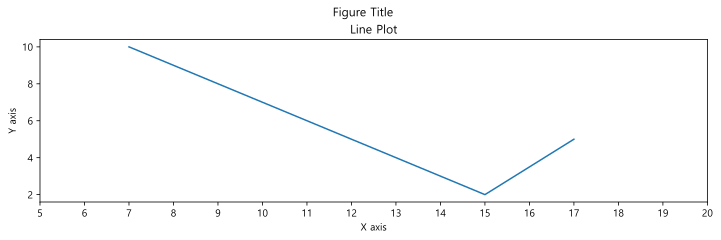

In [7]:
x = [-3, 5, 7]
y = [10, 2, 5]
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(x, y)
ax.set_xlim(-5, 10)
ax.set_ylabel('Y axis')
ax.set_xlabel('X axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', y=1.03)
ax.set_xticks(range(-5, 11), labels=range(5, 21))
plt.show()

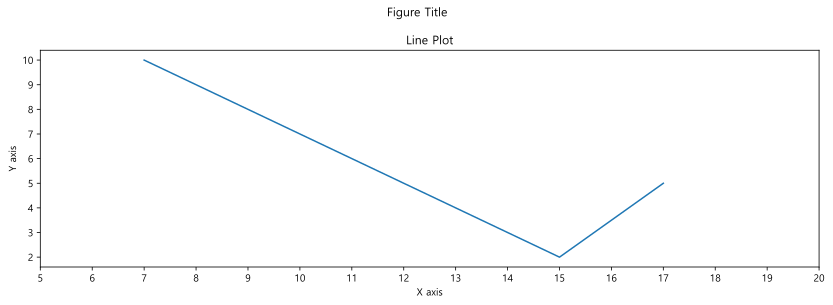

In [9]:
fig.get_size_inches()
fig.set_size_inches(14, 4)
fig

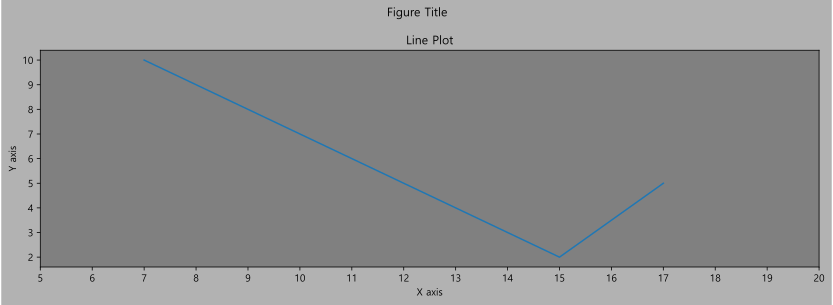

In [11]:
fig.set_facecolor('0.7')
ax.set_facecolor('0.5')
fig

In [12]:
ax.get_children()

 Text(0.5, 1.0, 'Line Plot'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

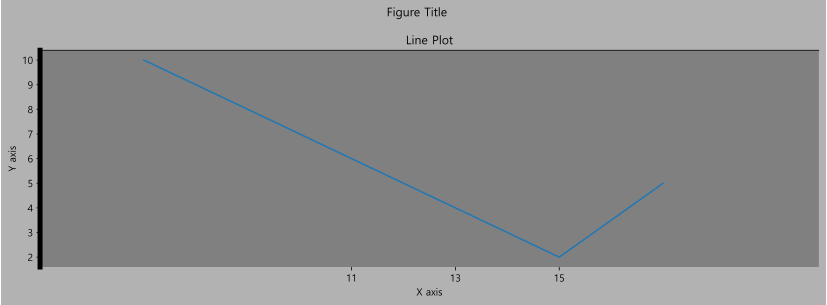

In [19]:
spines = ax.spines
spines['left'].set_linewidth(5)
spines['right'].set_linewidth(0)
spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([1, 3, 5])
fig

In [21]:
fig.get_facecolor()

(0.7, 0.7, 0.7, 1.0)

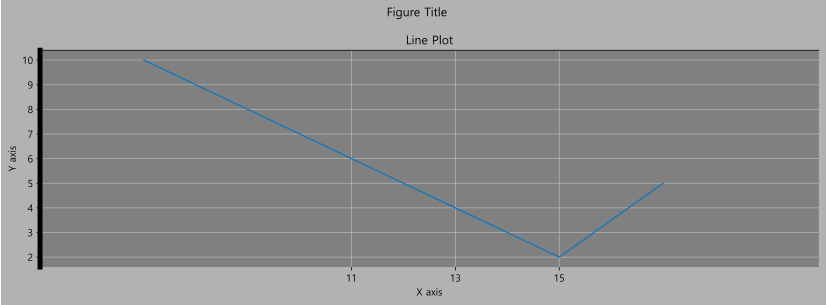

In [23]:
ax.grid(visible=True, axis='both')
fig

In [25]:
alta = pd.read_csv(p1 / 'alta-noaa-1980-2019.csv', parse_dates=['DATE'], index_col='DATE')
alta.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,DASF,MDPR,MDSF,PRCP,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-01,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.10,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.43,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.09,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.00,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-05,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.00,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data = alta.loc['2018-09':'2019-08']['SNWD'].interpolate(limit_direction='both')
data

DATE
2018-09-01    0.0
2018-09-02    0.0
2018-09-03    0.0
2018-09-04    0.0
2018-09-05    0.0
             ... 
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-08-31    0.0
Name: SNWD, Length: 364, dtype: float64

In [39]:
blue = '#99ddee'
white = '#ffffff'

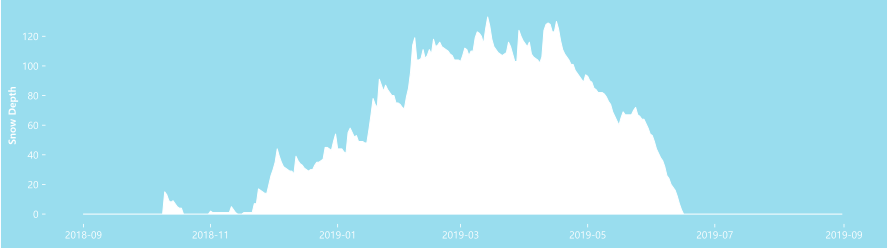

In [40]:
fig, ax = plt.subplots(figsize=(15, 4), linewidth=5, facecolor=blue)
ax.set_facecolor(blue)
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='both', colors=white)
ax.set_ylabel('Snow Depth', color=white, fontweight='bold')
ax.fill_between(data.index, data, color=white)
plt.show()

In [48]:
(data
 .to_frame()
 .assign(next=lambda df: df['SNWD'].shift(-1),
         snwd_diff=lambda df: df['SNWD'].sub(df['next'], fill_value=0))
)

,SNWD,next,snwd_diff
DATE,,,
2018-09-01,0.0,0.0,0.0
2018-09-02,0.0,0.0,0.0
2018-09-03,0.0,0.0,0.0
2018-09-04,0.0,0.0,0.0
2018-09-05,0.0,0.0,0.0
...,...,...,...
2019-08-27,0.0,0.0,0.0
2019-08-28,0.0,0.0,0.0
2019-08-29,0.0,0.0,0.0


In [54]:
(alta['SNWD']
 .interpolate()
 .to_frame()
 .assign(next=lambda df: df['SNWD'].shift(-1),
         snwd_diff=lambda df: df['next'].sub(df['SNWD'], fill_value=0))
         .query("snwd_diff > 50 or snwd_diff < -50")
)

,SNWD,next,snwd_diff
DATE,,,
1989-11-27,60.0,0.0,-60.0
2007-02-28,87.0,9.0,-78.0
2008-05-22,62.0,0.0,-62.0
2008-05-23,0.0,66.0,66.0
2009-01-16,76.0,0.0,-76.0
2009-01-17,0.0,70.0,70.0
2009-05-14,52.0,0.0,-52.0
2009-05-15,0.0,51.0,51.0
2009-05-17,55.0,0.0,-55.0


In [55]:
def fix_gaps(ser, thrs=50):
    mask = (ser
            .to_frame()
            .assign(next=lambda df: df.SNWD.shift(-1),
                    snow_diff=lambda df: df.next.sub(df.SNWD, fill_value=0))
        .pipe(lambda df: df.snow_diff.abs() > thrs)
    )
    return ser.where(~mask, np.nan)

In [56]:
(alta['SNWD']
 .pipe(fix_gaps)
 .interpolate()
)

DATE
1980-01-01    29.0
1980-01-02    34.0
1980-01-03    30.0
1980-01-04    30.0
1980-01-05    30.0
              ... 
2019-09-03     0.0
2019-09-04     0.0
2019-09-05     0.0
2019-09-06     0.0
2019-09-07     0.0
Name: SNWD, Length: 14160, dtype: float64

In [57]:
flights = pd.read_csv(p1 / 'flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [58]:
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']

In [61]:
fl_int = (flights
 .assign(DELAYED=flights['ARR_DELAY'].ge(15).astype('int'), ON_TIME=lambda df: 1 - df[cols].any(axis=1))
 .select_dtypes('int')
)
fl_int

,MONTH,DAY,WEEKDAY,SCHED_DEP,DIST,SCHED_ARR,DIVERTED,CANCELLED,DELAYED,ON_TIME
0,1,1,4,1625,590,1905,0,0,1,0
1,1,1,4,823,1452,1333,0,0,0,1
2,1,1,4,1305,641,1453,0,0,1,0
3,1,1,4,1555,1192,1935,0,0,0,1
4,1,1,4,1720,1363,2225,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,515,1464,1045,0,0,0,1
58488,12,31,4,1910,414,2050,0,0,0,1
58489,12,31,4,1846,262,1956,0,0,0,1
58490,12,31,4,525,907,855,0,0,1,0


In [62]:
df_date = (flights[['MONTH', 'DAY']]
 .assign(YEAR=2015, HOUR=flights['SCHED_DEP'] // 100, MINUTE=flights['SCHED_DEP'] % 100)
)
df_date

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20
...,...,...,...,...,...
58487,12,31,2015,5,15
58488,12,31,2015,19,10
58489,12,31,2015,18,46
58490,12,31,2015,5,25


In [64]:
fl_dep = pd.to_datetime(df_date)
fl_dep

0       2015-01-01 16:25:00
1       2015-01-01 08:23:00
2       2015-01-01 13:05:00
3       2015-01-01 15:55:00
4       2015-01-01 17:20:00
                ...        
58487   2015-12-31 05:15:00
58488   2015-12-31 19:10:00
58489   2015-12-31 18:46:00
58490   2015-12-31 05:25:00
58491   2015-12-31 08:59:00
Length: 58492, dtype: datetime64[ns]

In [65]:
fl_df = flights.assign(DELAYED=flights['ARR_DELAY'].ge(15).astype('int'), ON_TIME=lambda df: 1 - df[cols].any(axis=1))
fl_df.index = fl_dep
fl_df

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED,DELAYED,ON_TIME
2015-01-01 16:25:00,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0,1,0
2015-01-01 08:23:00,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0,0,1
2015-01-01 13:05:00,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0,1,0
2015-01-01 15:55:00,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0,0,1
2015-01-01 17:20:00,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 05:15:00,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0,0,1
2015-12-31 19:10:00,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0,0,1
2015-12-31 18:46:00,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0,0,1
2015-12-31 05:25:00,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0,1,0


<AxesSubplot:>

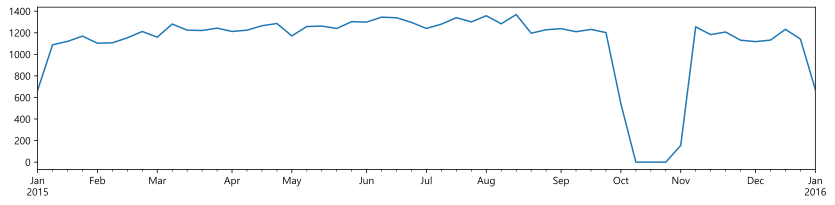

In [66]:
fc = fl_df.groupby(pd.Grouper(freq='W')).size()
fc.plot.line(figsize=(14, 3))

In [67]:
def interp_lt_n(df, n=600):
    return df.where(df > n).interpolate(limit_direction='both')

<AxesSubplot:>

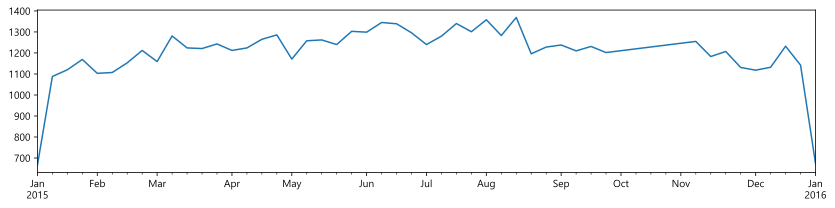

In [69]:
fc = fl_df.groupby(pd.Grouper(freq='W')).size().pipe(interp_lt_n)
fc.plot.line(figsize=(14, 3))

In [72]:
data = fl_df.groupby(pd.Grouper(freq='W')).size()
data

2015-01-04     666
2015-01-11    1088
2015-01-18    1120
2015-01-25    1169
2015-02-01    1103
2015-02-08    1107
2015-02-15    1153
2015-02-22    1212
2015-03-01    1159
2015-03-08    1281
2015-03-15    1224
2015-03-22    1221
2015-03-29    1243
2015-04-05    1212
2015-04-12    1224
2015-04-19    1265
2015-04-26    1286
2015-05-03    1171
2015-05-10    1258
2015-05-17    1262
2015-05-24    1240
2015-05-31    1303
2015-06-07    1299
2015-06-14    1345
2015-06-21    1339
2015-06-28    1296
2015-07-05    1240
2015-07-12    1280
2015-07-19    1340
2015-07-26    1301
2015-08-02    1358
2015-08-09    1283
2015-08-16    1369
2015-08-23    1196
2015-08-30    1228
2015-09-06    1238
2015-09-13    1210
2015-09-20    1231
2015-09-27    1202
2015-10-04     541
2015-10-11       0
2015-10-18       0
2015-10-25       0
2015-11-01     155
2015-11-08    1255
2015-11-15    1183
2015-11-22    1207
2015-11-29    1131
2015-12-06    1118
2015-12-13    1132
2015-12-20    1232
2015-12-27    1142
2016-01-03  

Text(0.8, 0.8, 'missing data')

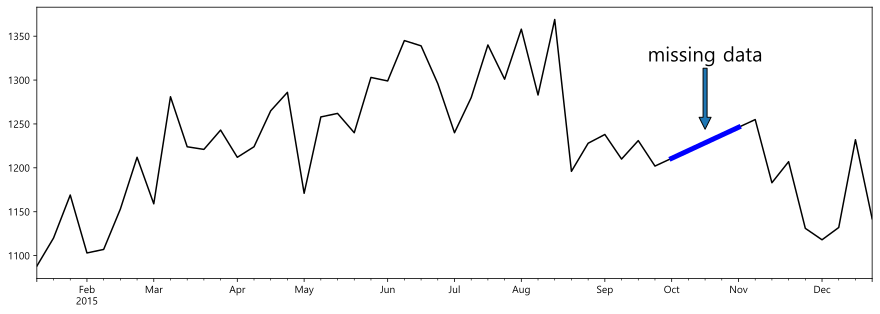

In [81]:
mask = data < 600
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
(data.pipe(interp_lt_n).iloc[1:-1].plot.line(color='black', ax=ax)
)
(data.pipe(interp_lt_n)[mask].plot.line(color='blue', linewidth=5, ax=ax)
)
ax.annotate(xy=(0.8, 0.55), xytext=(0.8, 0.8), xycoords='axes fraction', text='missing data', ha='center', arrowprops=dict(), size=20)

<AxesSubplot:xlabel='DEST_AIR'>

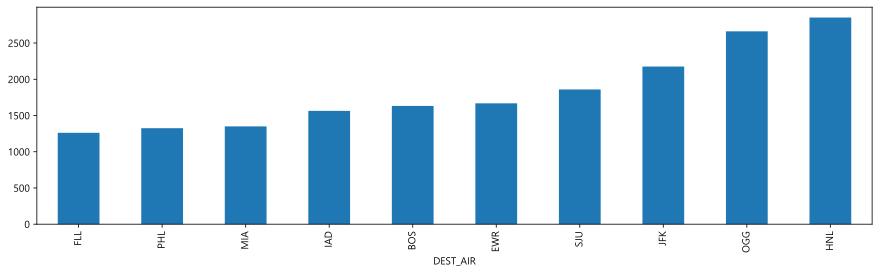

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(fl_df
 .groupby('DEST_AIR')['DIST']
 .agg(['mean', 'count'])
 .query("count > 100")
 .sort_values('mean')
 .tail(10)
 .plot.bar(y='mean', ax=ax, legend=False)
)

<AxesSubplot:xlabel='DIST', ylabel='AIR_TIME'>

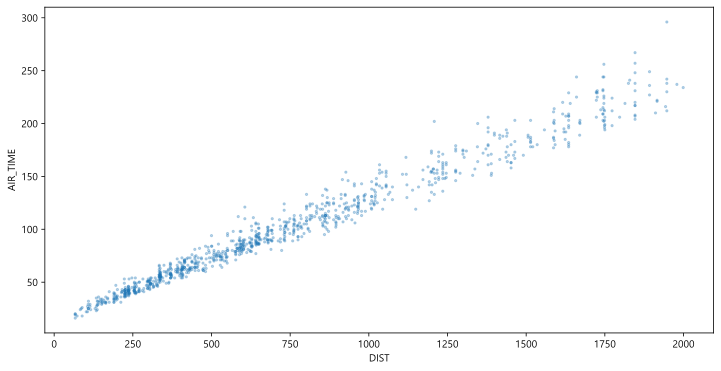

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
(fl_df.reset_index(drop=True)[['DIST', 'AIR_TIME']]
 .query("DIST <= 2000")
 .sample(n=1000, random_state=0)
 .dropna()
 .plot.scatter(x='DIST', y='AIR_TIME', ax=ax, alpha=.3, s=5)
)

In [89]:
(fl_df.reset_index(drop=True)[['DIST', 'AIR_TIME']]
 .query("DIST <= 2000")
 .sample(n=1000, random_state=0)
 .dropna()
 .pipe(lambda df: pd.cut(df['DIST'], bins=range(0, 2001, 250)))
 .value_counts()
 .sort_index()
)

DIST
(0, 250]        122
(250, 500]      249
(500, 750]      212
(750, 1000]     154
(1000, 1250]     87
(1250, 1500]     55
(1500, 1750]     75
(1750, 2000]     32
Name: count, dtype: int64

In [97]:
(fl_df.reset_index(drop=True)[['DIST', 'AIR_TIME']]
 .query("DIST <= 2000")
 .sample(n=1000, random_state=0)
 .dropna()
 .assign(BIN=lambda df: pd.cut(df['DIST'], bins=range(0, 2001, 250)))
 .reset_index(drop=True)
 .assign(SCORE=lambda df: df.groupby('BIN', observed=True)['AIR_TIME'].transform(lambda x: (x - x.mean()) / x.std()))
 .pivot(columns='BIN')['SCORE']
)

BIN,"(0, 250]","(250, 500]","(500, 750]","(750, 1000]","(1000, 1250]","(1250, 1500]","(1500, 1750]","(1750, 2000]"
0,NaN,-0.805763,NaN,NaN,NaN,NaN,NaN,NaN
1,0.864906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,-0.171316,NaN,NaN
3,0.089034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.493491,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
981,NaN,NaN,NaN,-0.178815,NaN,NaN,NaN,NaN
982,NaN,NaN,NaN,NaN,0.480832,NaN,NaN,NaN
983,0.994218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,NaN,NaN,NaN,NaN,0.876098,NaN,NaN,NaN


<AxesSubplot:>

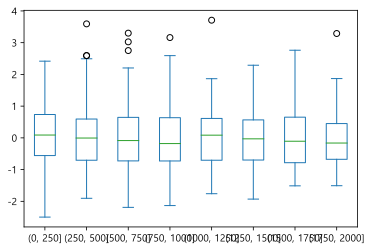

In [98]:
(fl_df.reset_index(drop=True)[['DIST', 'AIR_TIME']]
 .query("DIST <= 2000")
 .sample(n=1000, random_state=0)
 .dropna()
 .assign(BIN=lambda df: pd.cut(df['DIST'], bins=range(0, 2001, 250)))
 .reset_index(drop=True)
 .assign(SCORE=lambda df: df.groupby('BIN', observed=True)['AIR_TIME'].transform(lambda x: (x - x.mean()) / x.std()))
 .pivot(columns='BIN')['SCORE']
 .plot.box()
)

In [99]:
meetup = pd.read_csv(p1 / 'meetup_groups.csv', parse_dates=['join_date'], index_col='join_date')
meetup

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us
...,...,...,...,...
2017-10-07 18:05:24,houston data visualization,Houston,TX,us
2017-06-24 14:06:26,houston data visualization,Houston,TX,us
2015-10-05 17:08:40,houston data visualization,Houston,TX,us


In [105]:
(meetup
 .groupby([pd.Grouper(freq='M'), 'group'])
 .size()
 .unstack('group', fill_value=0)
 .cumsum()
 .pipe(lambda df: df.div(df.sum(axis=1), axis=0))
)

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-30,0.000000,0.000000,0.000000,0.000000,1.000000
2010-12-31,0.000000,0.000000,0.000000,0.000000,1.000000
2011-01-31,0.000000,0.000000,0.000000,0.000000,1.000000
2011-02-28,0.000000,0.000000,0.000000,0.000000,1.000000
2011-04-30,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...
2017-06-30,0.257152,0.241618,0.257921,0.089511,0.153799
2017-07-31,0.273498,0.236562,0.249928,0.091693,0.148318
2017-08-31,0.279995,0.230727,0.253664,0.092698,0.142915


<AxesSubplot:xlabel='join_date'>

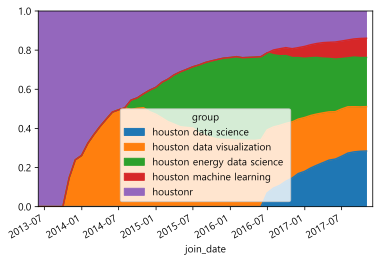

In [109]:
(meetup
 .groupby([pd.Grouper(freq='M'), 'group'])
 .size()
 .unstack('group', fill_value=0)
 .cumsum()
 .pipe(lambda df: df.div(df.sum(axis=1), axis=0))
 .plot.area(xlim=('2013-06', '2017-12'), ylim=(0, 1))
)

In [110]:
emp = pd.read_csv(p1 / 'employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE'])
emp

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='count', ylabel='DEPARTMENT'>

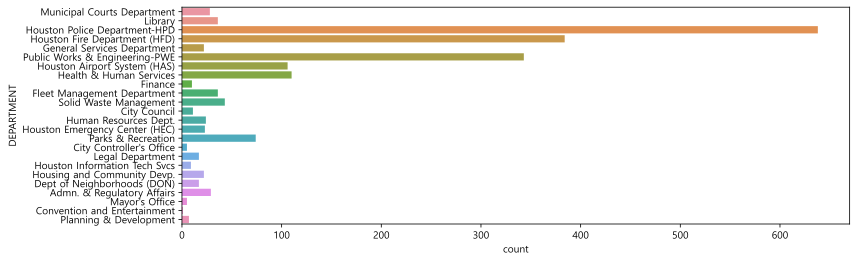

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.countplot(data=emp, y='DEPARTMENT', ax=ax)

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='BASE_SALARY', ylabel='RACE'>

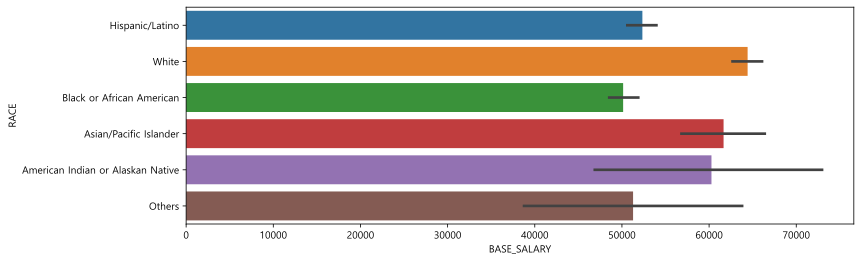

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.barplot(data=emp, x='BASE_SALARY', y='RACE', ax=ax)